<a href="https://colab.research.google.com/github/Swethashankar03/Prodigy-Task-/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


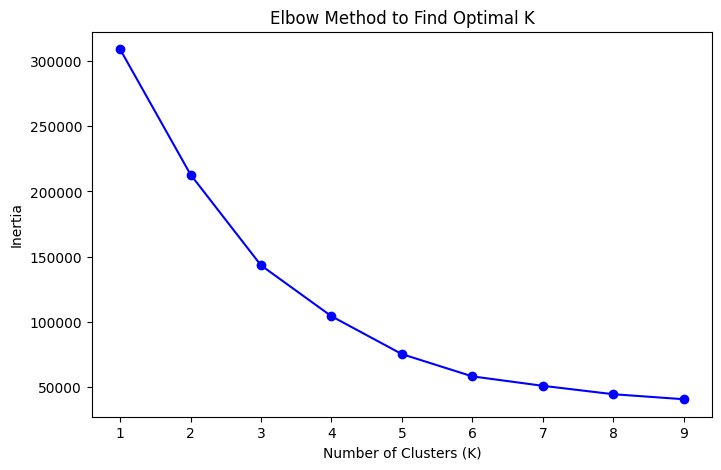


Cluster Centroids:
[[32.69230769 86.53846154 82.12820513  0.46153846]
 [40.32520325 44.15447154 49.82926829  0.40650407]
 [40.39473684 87.         18.63157895  0.52631579]]


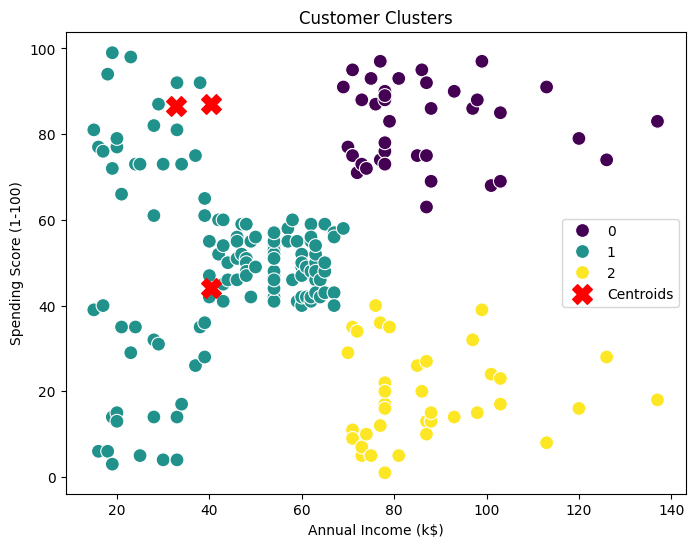


Cluster Assignments:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          1  
1          1  
2          1  
3    

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
Data = pd.read_csv('/content/Mall_Customers.csv')

# Drop 'CustomerID' (non-numeric, irrelevant for clustering)
X = Data.drop(columns=['CustomerID'])

# Convert 'Gender' column to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Gender'], drop_first=True) # Convert 'Gender' to numerical

# Visualize the dataset
print("Dataset:")
print(Data.head())

# Optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with optimal K (e.g., K=3 based on the elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly set n_init
Data['Cluster'] = kmeans.fit_predict(X)

# Centroids
centroids = kmeans.cluster_centers_
print("\nCluster Centroids:")
print(centroids)

# Visualize Clusters
# Update this section with appropriate column names from your dataset
# Assuming 'Annual Income (k$)' and 'Spending Score (1-100)' are relevant columns for clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Data, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Summary of Cluster Assignments
print("\nCluster Assignments:")
print(Data)